In [13]:
import pandas as pd

data = pd.read_csv("/content/btc_dataset.csv")


In [5]:
# Assuming 'data' is your DataFrame
columns = ['open', 'high', 'low', 'close', 'Volume USD']
statistics = data[columns].describe()
print(statistics)


               open          high           low         close    Volume USD
count  44419.000000  44419.000000  44419.000000  44419.000000  4.441900e+04
mean   21480.556969  21590.350107  21362.775785  21481.026110  2.804578e+06
std    16674.144532  16768.575754  16571.949239  16674.196307  6.560232e+06
min     3139.760000   3158.340000   3122.280000   3139.760000  0.000000e+00
25%     7924.585000   7961.530000   7881.615000   7924.585000  2.369850e+02
50%    16520.000000  16559.000000  16478.000000  16522.000000  4.708008e+05
75%    33258.490000  33516.835000  32932.195000  33251.215000  2.938296e+06
max    68635.050000  69000.000000  68447.000000  68627.010000  2.582324e+08


Close BTC Price Outlier Detection using Rolling Statistics

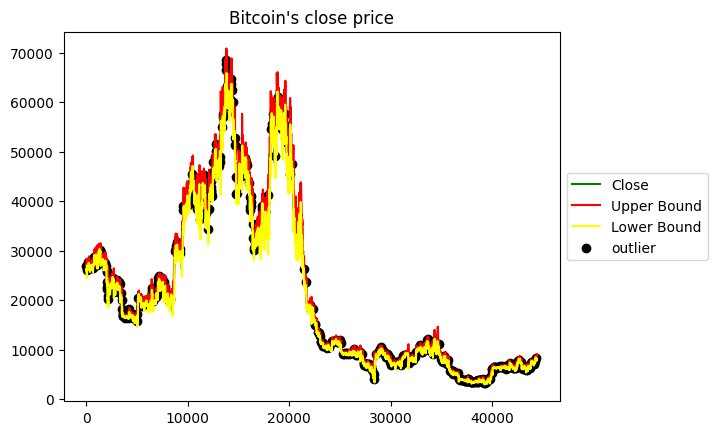

In [4]:
import matplotlib.pyplot as plt


# Calculate the rolling mean and standard deviation with a window of 21
df_rolling = data[["close"]].rolling(window=21).agg(["mean", "std"])

# Drop the top level of the multi-index created by the aggregation
df_rolling.columns = df_rolling.columns.droplevel()

# Join the rolling stats back to the original dataframe
data = data.join(df_rolling)

# Define the number of standard deviations for outlier detection
N_SIGMAS = 3

# Calculate the upper and lower bounds for outlier detection
data["upper"] = data["mean"] + N_SIGMAS * data["std"]
data["lower"] = data["mean"] - N_SIGMAS * data["std"]

# Create a boolean series that is True where the return is an outlier
data["outlier"] = (data["close"] > data["upper"]) | (data["close"] < data["lower"])

# Create a plot of the returns, the upper and lower bounds, and the outliers
fig, ax = plt.subplots()

# Plot the closing prices, upper bounds, and lower bounds with specified colors
ax.plot(data.index, data["close"], color="green", label="Close")
ax.plot(data.index, data["upper"], color="red", label="Upper Bound")
ax.plot(data.index, data["lower"], color="yellow", label="Lower Bound")

# Add the outliers to the plot
ax.scatter(data.loc[data["outlier"]].index,
           data.loc[data["outlier"], "close"],
           color="black", label="outlier")

# Set the title and legend of the plot
ax.set_title("Bitcoin's close price")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()
